In [1]:
# imports 
import numpy as np
from scipy import special
import matplotlib.pyplot as plt

In [2]:
class Constants:
    def __init__(self):
        self.k_b = 1.380649*10e-23 # boltzmann constant
        self.au = 1.66054e-27 # au to mass conversion factor
        self.mass1 = 85.4678 # mass 1 is RB - 85
        self.mass2 = 86.909184 # mass 2 is RB - 87
    
    def get_mass(self, mass_type):
        """
        mass_type 1,2 - indicating Rb 85 or 87
        return mass after converting to atomic mass units
        """
        if mass_type == 1:
            # RB - 85
            r = self.mass1*self.au
            return r
        elif mass_type == 2:
            # RB - 87
            r = self.mass2*self.au
            return r
    
    def get_kb(self):
        # boltzmann constant
        return self.k_b
                                        

In [21]:
class MB:
    def __init__(self):
        self.temps = [100, 200, 300, 400] # temperatures
        self.constants = Constants()
        self.k_b = constants.get_kb()
        self.mass = constants.get_mass(1)
        self.speeds = np.arange(0,2500)
        
    def pdf(self, temp):
        """
        selects temperature from index of list of temperatures
        """
        temp = self.temps[temp]
        f_v = (4/np.sqrt(np.pi))*((self.mass/(2*self.k_b*temp))**(3/2))*(self.speeds**2)*(np.exp((-self.mass*self.speeds**2)/(2*self.k_b*temp)))
        return f_v

    def pdf_(self, temp):
        """
        selects temperature from index of list of temperatures
        """
        f_v = (4/np.sqrt(np.pi))*((self.mass/(2*self.k_b*temp))**(3/2))*(self.speeds**2)*(np.exp((-self.mass*self.speeds**2)/(2*self.k_b*temp)))
        return f_v
    
    def plot_pdf(self):
        """
        plots maxwell-boltzmann distribution for each temperature
        """
        fig, ax = plt.subplots(1, 1)
        for i in mb.temps:
            ax.legend(loc='best', frameon=False)
            plt.plot(self.pdf(self.temps.index(i)))
    
    def cdf(self, temp):
        temp = self.temps[temp]
        a = np.sqrt((self.k_b*temp)/self.mass)
        dN = special.erf(self.speeds/(np.sqrt(2)*a))-(np.sqrt(2/np.pi)*self.speeds*np.exp(-self.speeds**2/(2*a**2))*(1/a))
        return dN
    
    def plot_cdf(self):
        fig, ax = plt.subplots(1, 1)
        for i in mb.temps:
            ax.legend(loc='best', frameon=False)
            plt.plot(self.cdf(self.temps.index(i)))
    
    def generate_velocity_vector(velocity):
        """
        Generates a random 3D unit vector (direction) with a uniform spherical distribution
        Algo from http://stackoverflow.com/questions/5408276/python-uniform-spherical-distribution
        :return:
        Reference: https://gist.github.com/andrewbolster/10274979
        """
        phi = np.random.uniform(0,np.pi*2)
        costheta = np.random.uniform(-1,1)

        theta = np.arccos( costheta )
        x = velocity * np.sin( theta) * np.cos( phi )
        y = velocity * np.sin( theta) * np.sin( phi )
        z = velocity * np.cos( theta )
        return (x,y,z)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


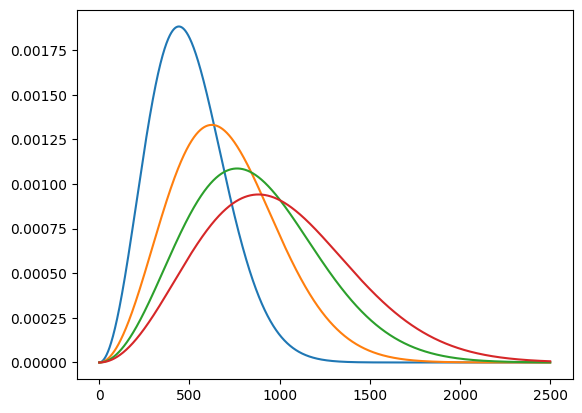

In [22]:
mb = MB()

mb.plot_pdf()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


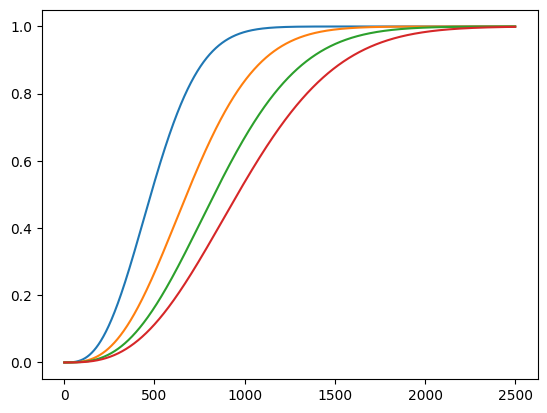

In [10]:
mb.plot_cdf()

## Monte Carlo Simulation

The area under the curve is approximately 299.9528417957315m/s


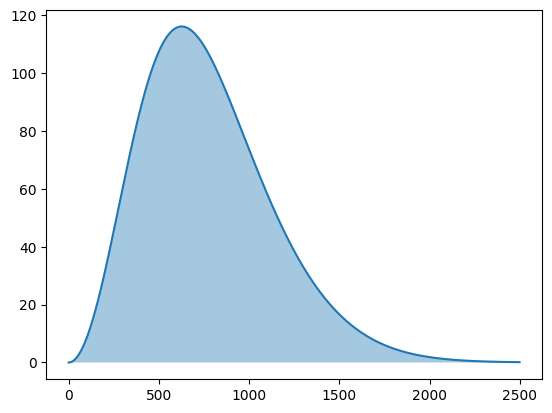

In [19]:
import random

constants = Constants()
speeds = np.arange(0,2500)
# Define the probability distribution function
def f(x):
    temp = x
    # pdf of the maxwell-boltzman distribution 
    f_v = (4/np.sqrt(np.pi))*((constants.get_mass(1)/(2*constants.get_kb()*temp))**(3/2))*(speeds**2)*(np.exp((-constants.get_mass(1)*speeds**2)/(2*constants.get_kb()*temp)))
    return f_v

# Define the number of samples to generate
num_samples = 100000

# Define the range of the random variable
a, b = 100, 400

# Initialize the sum of function evaluations
sum_f = 0

# Generate the samples and evaluate the function
for i in range(num_samples):
    # Generate a random sample
    x = random.uniform(a, b)
    # Evaluate the function at the sample
    fx = f(x)
    # Add the function evaluation to the sum
    sum_f += fx

# Calculate the average of the function evaluations
avg_f = sum_f / num_samples

# Calculate the area under the curve of the probability distribution
area = avg_f * (b - a)
cdf = area

plt.fill_between(speeds, sum_f, step="pre", alpha=0.4)
plt.plot(sum_f)

# Print the result
print("The area under the curve is approximately " + str(sum(area)) + "m/s")

In [52]:
import random

jose_mb = MB()

constants = jose_mb.constants
speeds = jose_mb.speeds
# removing the f(x) function because it is already included within the MB Object

# Define the number of samples to generate - 100k
num_samples = 100000

# Define the range of the random variable - 100K - 400K
a, b = 100, 400

# Initialize the sum of function evaluations - Initial sum Zero
sum_f = 0

velocities = []
velocity_vectors = []

# Generate the samples and evaluate the function
for i in range(num_samples):
    # Generate a random sample - returns a single number for the temperature
    x = random.uniform(a, b)
    # Evaluate the function at the sample
    fx = jose_mb.pdf_(x) # generates a list of len of speeds of the temperature inserted
    velocities.append(fx) 
    #fx_vector = jose_mb.generate_velocity_vector(fx)
    #velocity_vectors.append(fx_vector)
    # Add the function evaluation to the sum
    sum_f += fx

# Calculate the average of the function evaluations
avg_f = sum(velocities) / len(velocities)

if sum_f == sum(velocities):
    print(True)

# Calculate the area under the curve of the probability distribution
area = avg_f * (b - a)
cdf = area

plt.fill_between(speeds, sum_f, step="pre", alpha=0.4)
plt.plot(sum_f)

# Print the result
print("The area under the curve is approximately " + str(sum(area)) + "m/s")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [49]:
def AVG(list_obj):
    return sum(list_obj)/len(list_obj)

avg_vel = AVG(velocities[0])
vel = avg_vel * (b-a)
vel

0.11999998559360141

In [40]:
sum(velocities[0])/len(velocities[0])*300

0.11999998559360141